# Air-quality dataset

This notebook will use a timeseries datasets around the subject of air-quality on an Italian city.

In [1]:
import os
import json
import random
from datetime import datetime
from pathlib import Path
from zipfile import ZipFile

In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
kaggle_data = json.load(open(str(Path.home()) + '/kaggle.json', 'r'))
KAGGLE_USERNAME = kaggle_data['username']
KAGGLE_KEY = kaggle_data['key']

In [4]:
if KAGGLE_KEY and KAGGLE_USERNAME: print('Successfully imported access to kaggle')

Successfully imported access to kaggle


In [5]:
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

In [6]:
!rm -rf data/ && rm -rf *.zip

print('Dataset will be downloaded as zip under the current directory')
!kaggle datasets download -d citrahsagala/airquality

print('\nInformation about the dataset : https://www.kaggle.com/citrahsagala/airquality')

Dataset will be downloaded as zip under the current directory
  0%|                                                | 0.00/244k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 244k/244k [00:00<00:00, 8.71MB/s]

Information about the dataset : https://www.kaggle.com/citrahsagala/airquality


In [7]:
!ls

'2021-10 - intro nn - fastai - multilabel classification.ipynb'
'2021-10 - intro nn - from scratch  - kaggle download + dataloader.ipynb'
'2021-11 - intro nn - fork - pytorch - multiclass - boats - 1 - data exploration.ipynb'
'2021-11 - intro nn - fork - pytorch  - multiclass - boats - 2 - model creation.ipynb'
'2021-11 - timeseries forecasting - NN-LSTM - 1 - data exploration and feature engineering.ipynb'
'2021-11 - timeseries forecasting - NN-LSTM - 2 - model creation and regularization.ipynb'
 airquality.zip
 tmp


In [8]:
!unzip *.zip -d ./data

Archive:  airquality.zip
  inflating: ./data/AirQualityUCI.csv  


In [9]:
!ls data/

AirQualityUCI.csv


In [10]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [11]:
df_raw = pd.read_csv('./data/AirQualityUCI.csv')

In [12]:
len(df_raw.columns)

15

In [13]:
display_all(df_raw.head().T)

,0,1,2,3,4
Date,10/3/2004,10/3/2004,10/3/2004,10/3/2004,10/3/2004
Time,18.00.00,19.00.00,20.00.00,21.00.00,22.00.00
CO(GT),2.6,2.0,2.2,2.2,1.6
PT08.S1(CO),1360,1292,1402,1376,1272
NMHC(GT),150.0,112.0,88.0,80.0,51.0
C6H6(GT),11.9,9.4,9.0,9.2,6.5
PT08.S2(NMHC),1046,955,939,948,836
NOx(GT),166,103,131,172,131
PT08.S3(NOx),1056,1174,1140,1092,1205
NO2(GT),113,92,114,122,116


## Studying our dataset - EDA

For each columns, we'll show description information and a plot using a logarithm scale (less sensitive to outliers)

In [14]:
keys = df_raw.columns; keys

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [15]:
def show_eda_and_hist(key, bins=25):
    print(
        'Descriptive data\n', 
        'Min', df_raw[key].min(), 
        'Max', df_raw[key].max(), 
        'Std', df_raw[key].std(), 
        'Median', df_raw[key].median(), 
        'Mean', df_raw[key].mean(),
        '\n'
    )

    plt.title(key)
    try:
        plt.hist(np.log(df_raw[key]), bins=bins)
    except Exception:
        plt.hist(df_raw[key], bins=bins)
    plt.show()

In [16]:
current_key = 'Date'
df_raw[current_key].min(), df_raw[current_key].max()

('1/1/2005', '9/9/2004')

CO(GT)
Descriptive data
 Min -200.0 Max 1428.0 Std 79.09607960796946 Median 1.5 Mean -34.03353638986855 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


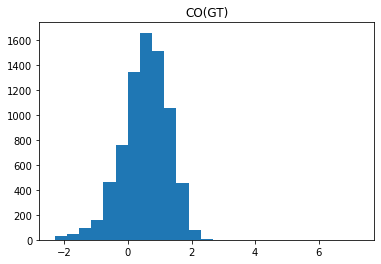

PT08.S1(CO)
Descriptive data
 Min -200 Max 2040 Std 330.06206686690444 Median 1053.0 Mean 1048.8160735278402 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


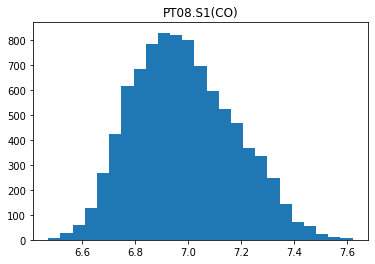

NMHC(GT)
Descriptive data
 Min -200.0 Max 1189.0 Std 139.80083580095925 Median -200.0 Mean -159.0664849845036 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


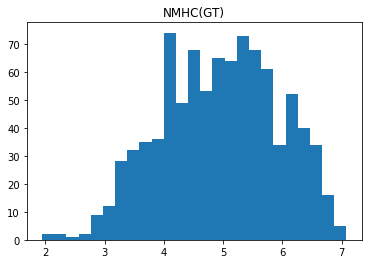

C6H6(GT)
Descriptive data
 Min -200.0 Max 1321.0 Std 43.56894185641545 Median 7.9 Mean 2.0046275515656724 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


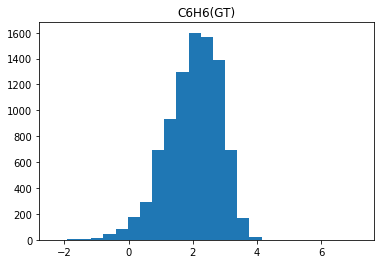

PT08.S2(NMHC)
Descriptive data
 Min -200 Max 2214 Std 342.49183369209544 Median 895.0 Mean 894.4327241637277 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


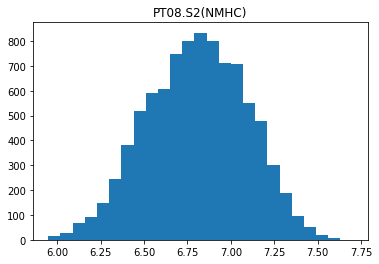

NOx(GT)
Descriptive data
 Min -200 Max 1479 Std 257.4348990237945 Median 141.0 Mean 168.69648391578497 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


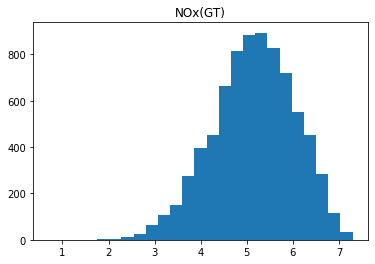

PT08.S3(NOx)
Descriptive data
 Min -200 Max 2683 Std 322.14736186452365 Median 794.0 Mean 794.9106551245058 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


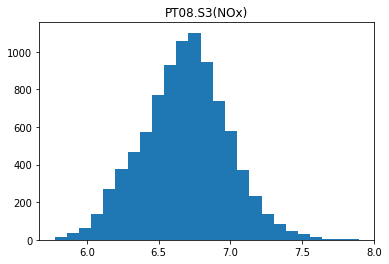

NO2(GT)
Descriptive data
 Min -200 Max 1779 Std 128.15314345423764 Median 96.0 Mean 58.360371914075024 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


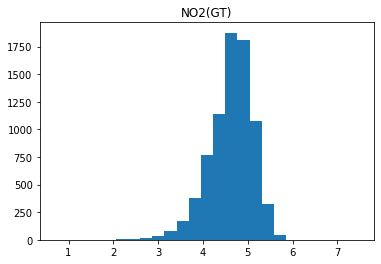

PT08.S4(NO2)
Descriptive data
 Min -200 Max 2775 Std 467.19897248609857 Median 1446.0 Mean 1391.4627551565673 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


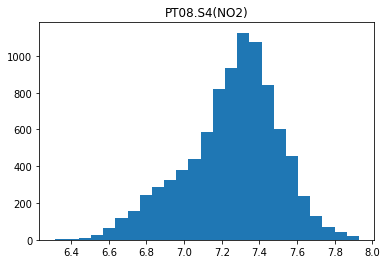

PT08.S5(O3)
Descriptive data
 Min -200.0 Max 2523.0 Std 456.99634780984104 Median 942.0 Mean 974.9007801645827 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


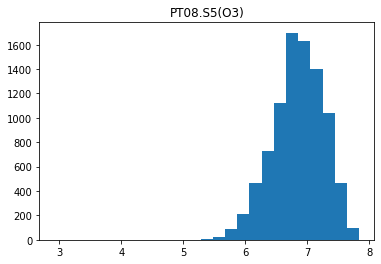

T
Descriptive data
 Min -200.0 Max 57.2 Std 43.206308240532955 Median 17.2 Mean 9.782430266110932 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


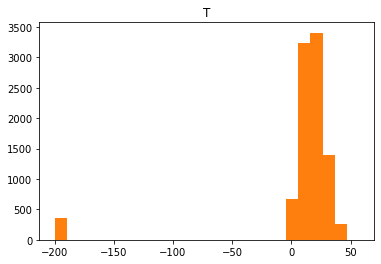

RH
Descriptive data
 Min -200.0 Max 88.7 Std 51.21734546069419 Median 48.5 Mean 39.47939666559795 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


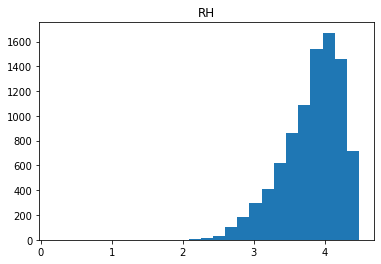

AH
Descriptive data
 Min -200.0 Max 2.231 Std 38.978664395630815 Median 0.9768 Mean -6.838464290294997 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


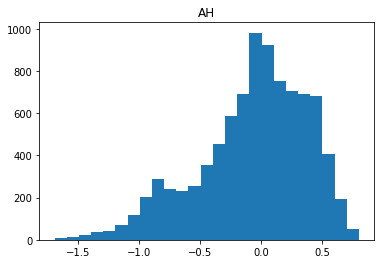

In [17]:
for key in list(keys[2:]):
    print(key)
    show_eda_and_hist(key)

We can see that we have outliers with the temperature (a classic with IoT data), the rest of the data and properly distributed.

## Feature engineering

Applying domain knowledge to enrich dataset with meaningful informations

In [18]:
filter_temperature = df_raw['T'] < -50

In [19]:
def apply_previous_value(df, key, filtered_df):
    for outlier_index in filtered_df.index:
        try:
            df[key][outlier_index] = df[key][outlier_index-1]
            return df
        except Exception as err:
            print(err)
            pass

In [20]:
df = apply_previous_value(df_raw, 'T', df_raw[filter_temperature])

/tmp/ipykernel_22336/246015494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key][outlier_index] = df[key][outlier_index-1]


Descriptive data
 Min -200.0 Max 57.2 Std 43.15201217999003 Median 17.2 Mean 9.806134444800685 



/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nelth/anaconda3/envs/ml-playground/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


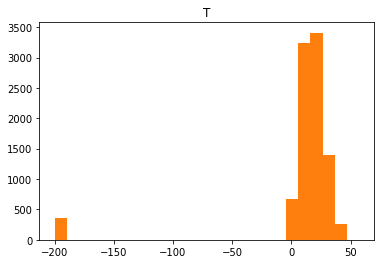

In [21]:
show_eda_and_hist('T')

In [22]:
def get_datetime_from_str(f):
    try:
        f = f[:18] # Make sure our string object only contains datetime data
        return datetime.strptime(f, "%d/%m/%Y %H:%M:%S")
    except Exception as err:
        print(f, err)

In [23]:
def apply_date_transformation(df):
    df['Time'] = df['Time'].apply(lambda f: f.replace('.', ':'))
    datetime_str = df['Date'] + ' ' + df['Time']
    df['datetime'] = datetime_str.apply(get_datetime_from_str)
#     df.set_index('datetime', inplace=True)
#     df = df.drop(['Date', 'Time'], axis=1)
    return df

In [24]:
df = apply_date_transformation(df_raw)

In [25]:
df.head().T

,0,1,2,3,4
Date,10/3/2004,10/3/2004,10/3/2004,10/3/2004,10/3/2004
Time,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00
CO(GT),2.6,2.0,2.2,2.2,1.6
PT08.S1(CO),1360,1292,1402,1376,1272
NMHC(GT),150.0,112.0,88.0,80.0,51.0
C6H6(GT),11.9,9.4,9.0,9.2,6.5
PT08.S2(NMHC),1046,955,939,948,836
NOx(GT),166,103,131,172,131
PT08.S3(NOx),1056,1174,1140,1092,1205
NO2(GT),113,92,114,122,116


In [26]:
import re

def add_datecols(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
        df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: 
        df = df.drop(fldname, axis=1)
    return df

In [27]:
df = add_datecols(df, 'datetime', drop=True)

/tmp/ipykernel_22336/155534989.py:14: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
/tmp/ipykernel_22336/155534989.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[targ_pre+n] = getattr(fld.dt,n.lower())


In [28]:
df.head().T

,0,1,2,3,4
Date,10/3/2004,10/3/2004,10/3/2004,10/3/2004,10/3/2004
Time,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00
CO(GT),2.6,2.0,2.2,2.2,1.6
PT08.S1(CO),1360,1292,1402,1376,1272
NMHC(GT),150.0,112.0,88.0,80.0,51.0
C6H6(GT),11.9,9.4,9.0,9.2,6.5
PT08.S2(NMHC),1046,955,939,948,836
NOx(GT),166,103,131,172,131
PT08.S3(NOx),1056,1174,1140,1092,1205
NO2(GT),113,92,114,122,116


In [29]:
!pip install pyarrow

In [30]:
!mkdir tmp

mkdir: cannot create directory ‘tmp’: File exists


In [31]:
df.to_feather('tmp/feather')